In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Problem1 Rank State by Funding and Funding per student
### After processing and plotting, we see California has highest total state funding while District of Columbia has highest funding per student

In [6]:
# read raw fiscal dta
fiscal_data=pd.read_csv("Sdf16_1a.txt", sep='\t')
#drop missing and na for revenue
fiscal_data= fiscal_data[fiscal_data.TFEDREV > 0]

C:\Users\hudie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
rank = fiscal_data.groupby("STNAME").sum().sort_values(by='TFEDREV', ascending=False)
rank.head(3)

,FIPST,YEAR,CCDNF,CENFILE,V33,MEMBERSCH,TOTALREV,TFEDREV,C14,C15,...,_66V,W01,W31,W61,V95,V02,K14,CE1,CE2,WEIGHT
STNAME,,,,,,,,,,,,,,,,,,,,,
California,6108,16288,1018,1017,6203559,6187037,89110947000,7709275000,1798207000,1821197000,...,0,4946663000,10871931000,29391495000,0,0,0,-1018,-1018,1018
Texas,58368,19456,1216,1044,5296442,5296378,60768409000,6194317000,1347799000,847121000,...,3618330000,2947662000,12040448000,18156976000,1196458000,0,0,41141377000,4911673000,1216
New York,24732,10992,687,677,2591958,2572154,67051220000,3374794000,1035611000,699120000,...,2032288000,428102000,1425604000,9234538000,0,0,0,-687,-687,687


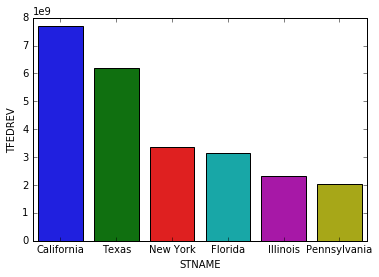

In [38]:
sns.barplot( x = 'STNAME', y ='TFEDREV', data=rank.head(6).reset_index() )
# From the plot we see California has most funding

In [52]:
#Next we rank state by funding per student
rank['fund_per_st'] = rank['TFEDREV']/rank['V33']
rank_per_st = rank.sort_values(by="fund_per_st", ascending=False).head(5)
rank_per_st['fund_per_st']

STNAME
District of Columbia    2726.573612
Alaska                  2319.798908
Vermont                 1870.899241
Louisiana               1556.713877
New Mexico              1541.345235
Name: fund_per_st, dtype: float64

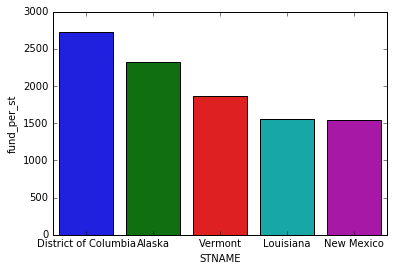

In [53]:
sns.barplot( x = 'STNAME', y ='fund_per_st', data=rank_per_st.reset_index() )
#we see columbia district has highest funding per student

## Problem2: Visualize the relationship between school districts’ total revenue and expenditures. Which states have the most debt per student?

#### From the plot we see total rev and total expenditure is positive related which makes sense as they would spend more if the get more funding( or say if the schools's expenditure is more they'll apply more funding)
#### And we see North Dakota has highest debt(rev-expenditure) per student


In [61]:
fiscal_data = fiscal_data[fiscal_data['TOTALEXP'] > 0]
fiscal_data = fiscal_data[fiscal_data['V33'] > 0]
p2_data = fiscal_data[['STNAME','TOTALREV','TOTALEXP','V33']]
#get debt
p2_data['TOTALDEBT'] = p2_data['TOTALEXP']-p2_data['TOTALREV']
p2_data = p2_data.groupby("STNAME").sum()
#get debt/student
p2_data['debt_per_st'] = p2_data['TOTALDEBT']/p2_data['V33']

C:\Users\hudie\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [62]:
p2_data.head(5)

,TOTALREV,TOTALEXP,V33,TOTALDEBT,debt_per_st
STNAME,,,,,
Alabama,7607098000,7864636000,743789,257538000,346.251423
Alaska,2494691000,2623014000,132477,128323000,968.643614
Arizona,9754612000,9273737000,1078877,-480875000,-445.718094
Arkansas,5405694000,5420487000,491281,14793000,30.111077
California,88617544000,84741618000,6203660,-3875926000,-624.780533


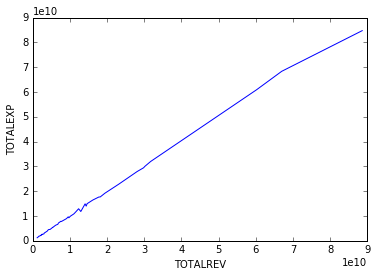

In [64]:
sns.lineplot(x="TOTALREV", y="TOTALEXP", data=p2_data)

In [66]:
p2_data.sort_values(by="debt_per_st",ascending=False).head(5)

,TOTALREV,TOTALEXP,V33,TOTALDEBT,debt_per_st
STNAME,,,,,
North Dakota,1708995000,1882038000,108343,173043000,1597.177483
District of Columbia,2121210000,2232976000,82974,111766000,1347.000265
Alaska,2494691000,2623014000,132477,128323000,968.643614
Nebraska,4252096000,4491448000,315542,239352000,758.542444
Minnesota,12377927000,12921241000,861905,543314000,630.364135


# Problem3

In [77]:
math_data = pd.read_csv("rla-achievement-sch-sy2015-16 (1).csv")

C:\Users\hudie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (13,19,21,23,27,33,35,37,39,41,47,51,53,55,57,61,67,77,79,81,83,85,87,91,103,105,107,109,111,113,115,117,121,123,125,131,133,135,137,139,145,147,149,151,159,161,165,167,173,175,177,179,187,195,211,217,219,221,223,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
#'ALL_RLA00PCTPROF_1516' is blurred and has range instead of numbers
# we can transform the range to a number by impute as mean, then use the data
math_data['ALL_RLA00PCTPROF_1516'].head(10)

0       33
1       31
2       30
3       36
4       42
5       27
6    20-29
7       25
8    25-29
9       22
Name: ALL_RLA00PCTPROF_1516, dtype: object

In [133]:
def impute_as_mean(col):
    new_col=[]
    for x in col:
        
        x=x.split('-')
        # check if value is a range, we inpute the mean
        if len(x)>1:
            low = int(x[0])
            high = int(x[1])
            mean = (low+high)/2
            new_col.append(mean)
        # check if le or ge in x, we impute the score after LE,GE
        elif'L' in x[0] or 'G'in x[0]:
            x=int(x[0][2:])
            new_col.append(x)
        # check if PS is in x, we don't have any information, then we impute a -1 to represent such missing case
        elif'PS' in x:
            x=-1
        else:
            new_col.append(int(x[0]))
    return new_col

In [146]:
impute_as_mean(math_data['ALL_RLA00PCTPROF_1516'])[:20]

[33,
 31,
 30,
 36,
 42,
 27,
 24.5,
 25,
 27.0,
 22,
 57.0,
 37,
 27.0,
 42.0,
 37,
 25,
 42.0,
 61,
 48,
 68]

(array([ 1822.,  5693.,  8423., 10334., 11624., 14828., 12869., 10631.,
         7359.,  3351.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

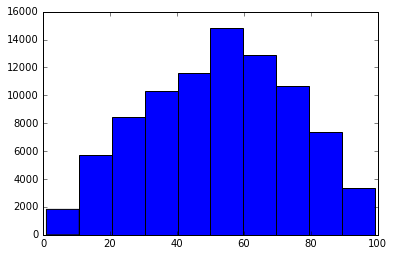

In [141]:
plt.hist(impute_as_mean(math_data['ALL_RLA00PCTPROF_1516']))

## Problem4 You are tasked with cutting 15% of the U.S. federal budget currently being spent on funding school districts. How much money is this? Choose which school districts will have their funding cut and how this will be done.

### I suggest we first check how many schools that has revenue>expenditure, and do a equal funding cut for these schools to make the funding more efficient overall

In [148]:
# read raw fiscal dta
fiscal_data=pd.read_csv("Sdf16_1a.txt", sep='\t')
#drop missing and na for revenue
fiscal_data= fiscal_data[fiscal_data.TFEDREV > 0]
0.15*sum(fiscal_data.TFEDREV)

C:\Users\hudie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


8340411300.0

In [157]:
fiscal_data[fiscal_data['TFEDREV']>fiscal_data['TOTALEXP']].NAME
#So we find there are only 13 schools that has funding>expenditure, thus it's not reasonable to do the whole funding cut on these ones
# we can first do a part of funding cut on these schools, then do a equal funding cut on all schools remaning, untill we get our
# 8340411300.0 funding cut goal

475      Akimel O'Otham Pee Posh Charter School Inc. 1
2747                      EASTERN CONNECTICUT REGIONAL
2811                              EDUCATION CONNECTION
2878                     COMMITTEE FOR SHARED SERVICES
4539                  Greater Randolph Interlocal Coop
4633                   Ripley-Ohio-Dearborn Sp Ed Coop
7676                                        Wayne RESA
10857                            WALATOWA CHARTER HIGH
12335                              GRAND FORKS AFB 140
12529                                    MINOT AFB 160
15845                  REG 10 EDUCATION SERVICE CENTER
15870                  REG 18 EDUCATION SERVICE CENTER
17199                          Barre Supervisory Union
Name: NAME, dtype: object

## Problem5
### I suggest we first check how many schools that has revenue>expenditure, and do a major funding cut for these schools to make the funding more efficient for our fiscal year. However, since we find there are only 13 schools that has rev>expenditure, it's not reasonable to only cut these small amount of schools. Thus, we can rely on other measurement, for example, we want cut fundings by counting student's debt, we will cut fundings for those schools that has lower student debt first.